In [11]:
import os
# List all directories in /kaggle/input/
os.listdir('/kaggle/input/evdataset')


['dataset.csv']

In [12]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 5.0 MB/s eta 0:00:00


In [22]:
! pip install plotly

In [24]:

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import bar_chart_race as bcr
from IPython.display import Video


# Load your dataset
df = pd.read_csv('/kaggle/input/evdataset/dataset.csv')



In [33]:
# Check the types of each column
print(df.dtypes)

# Separate the columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [34]:
# Task 1: Univariate and Bivariate Analysis

# Univariate Analysis for Numerical Variables
def univariate_numerical(df, columns):
    df[columns].hist(bins=20, figsize=(12, 6), color='lightblue')
    plt.suptitle('Univariate Analysis of Numerical Variables')
    plt.show()

In [35]:
# Univariate Analysis for Categorical Variables
def univariate_categorical(df, column):
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='Set2')
    plt.title(f'Univariate Analysis of {column}')
    plt.show()

In [36]:
# Bivariate Analysis: Numerical vs Numerical
def bivariate_num_vs_num(df, x_col, y_col):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Bivariate Analysis between {x_col} and {y_col}')
    plt.show()

In [37]:
# Bivariate Analysis: Categorical vs Categorical
def bivariate_cat_vs_cat(df, x_col, y_col):
    cross_tab = pd.crosstab(df[x_col], df[y_col])
    cross_tab.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
    plt.title(f'Bivariate Analysis between {x_col} and {y_col}')
    plt.show()

In [38]:
# Bivariate Analysis: Categorical vs Numerical
def bivariate_cat_vs_num(df, cat_col, num_col):
    plt.figure(figsize=(10,6))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'Bivariate Analysis of {cat_col} and {num_col}')
    plt.show()

In [39]:
# Task 2: Choropleth Map using Plotly Express
def plot_choropleth(df):
    ev_count_by_state = df.groupby('State').size().reset_index(name='EV Count')
    fig = px.choropleth(ev_count_by_state, locations='State', locationmode='USA-states', 
                        color='EV Count', color_continuous_scale="Viridis", 
                        scope="usa", title="Number of Electric Vehicles by State")
    fig.show()

In [40]:
# Task 3: Racing Bar Chart for EV Sales Over the Years
def create_racing_bar_chart(df):
    # Prepare data for racing bar chart
    sales_by_year_make = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)
    # Sort by years for animation
    sales_by_year_make = sales_by_year_make.loc[sorted(sales_by_year_make.index)]
    
    # Create racing bar chart
    bcr.bar_chart_race(df=sales_by_year_make, figsize=(10, 6), title="EV Sales by Make over the Years", n_bars=8)

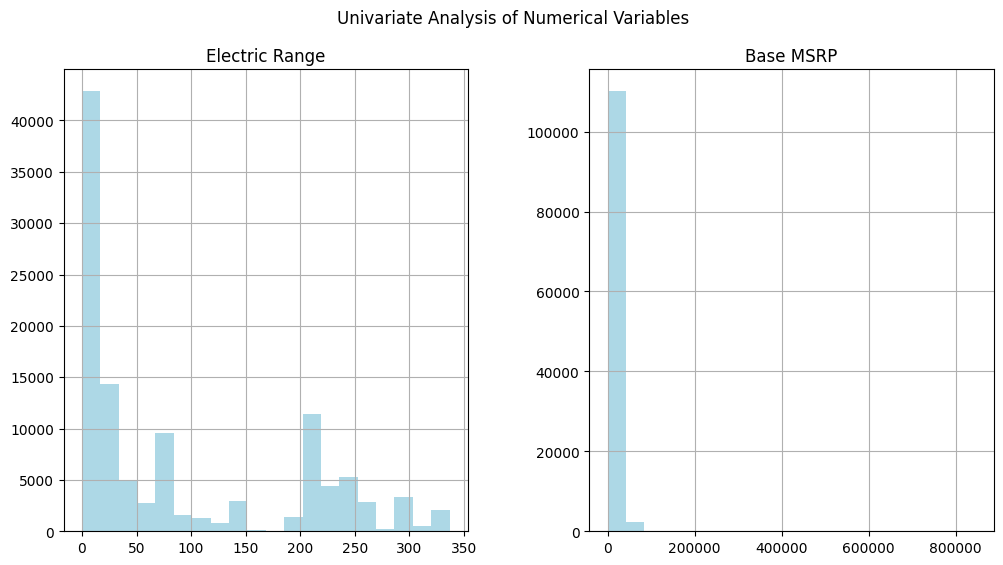

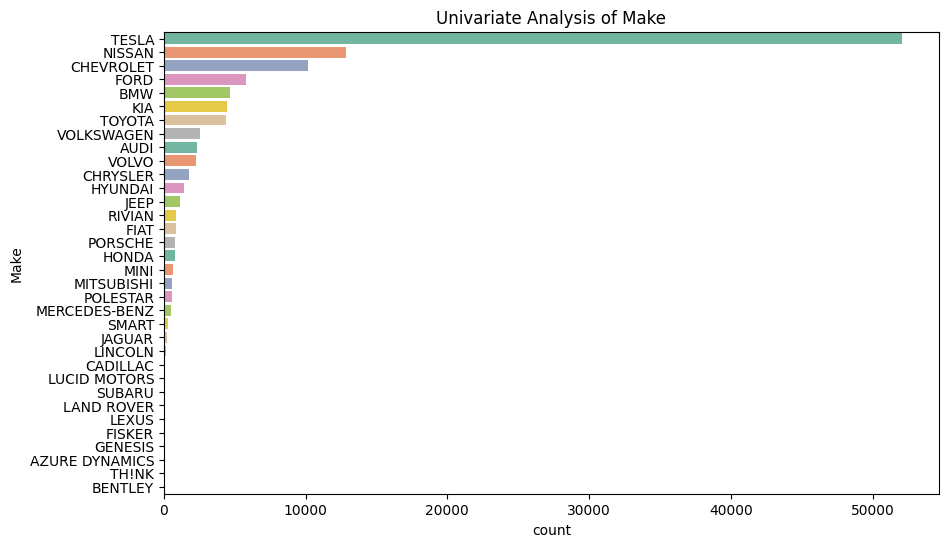

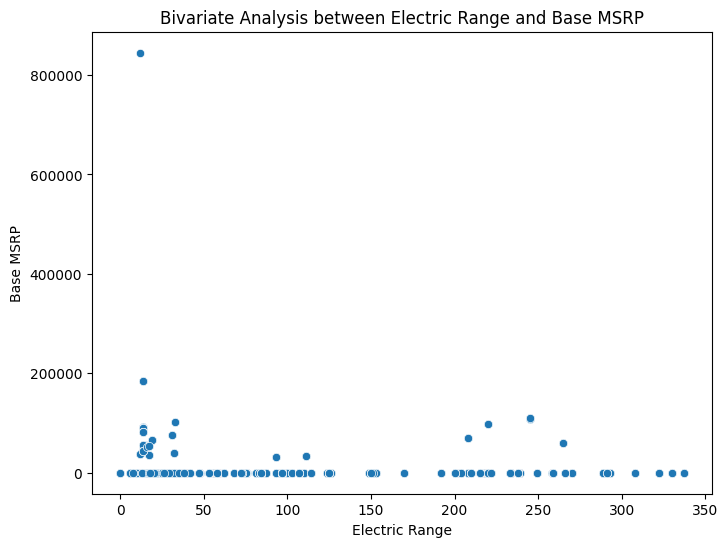

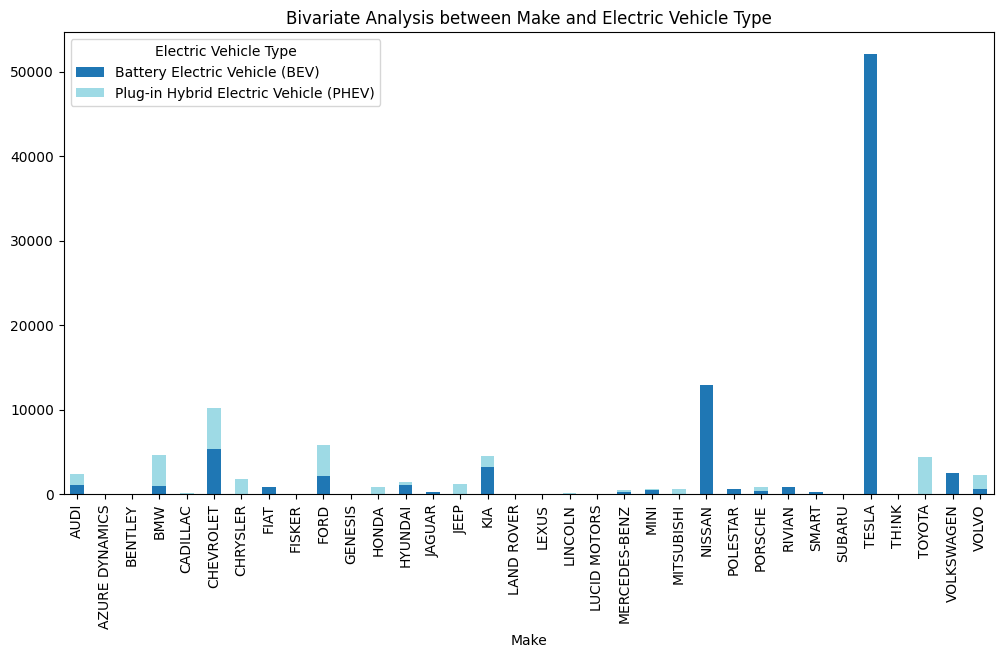

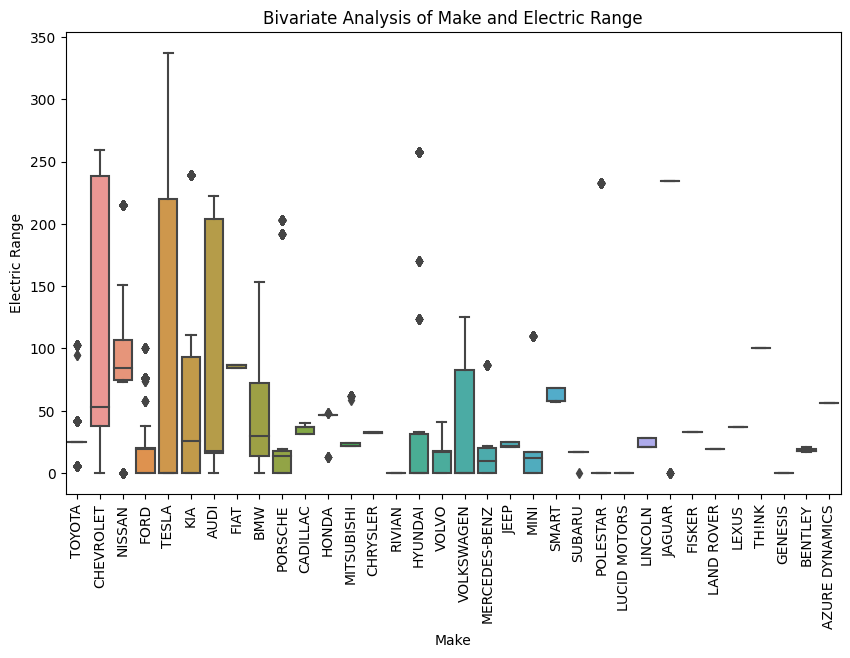

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



In [43]:
# Run the analysis

# Univariate Analysis
univariate_numerical(df, ['Electric Range', 'Base MSRP'])  # Replace with your numerical columns
univariate_categorical(df, 'Make')  # Replace with your categorical column

# Bivariate Analysis
bivariate_num_vs_num(df, 'Electric Range', 'Base MSRP')  # Replace with your numerical columns
bivariate_cat_vs_cat(df, 'Make', 'Electric Vehicle Type')  # Replace with your categorical columns
bivariate_cat_vs_num(df, 'Make', 'Electric Range')  # Replace with a categorical and numerical column
# Task 2: Plot the choropleth map
plot_choropleth(df)

# Task 3: Create racing bar chart
create_racing_bar_chart(df)

Dataset Loaded | Time: 2024-10-11 14:31:30
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                          

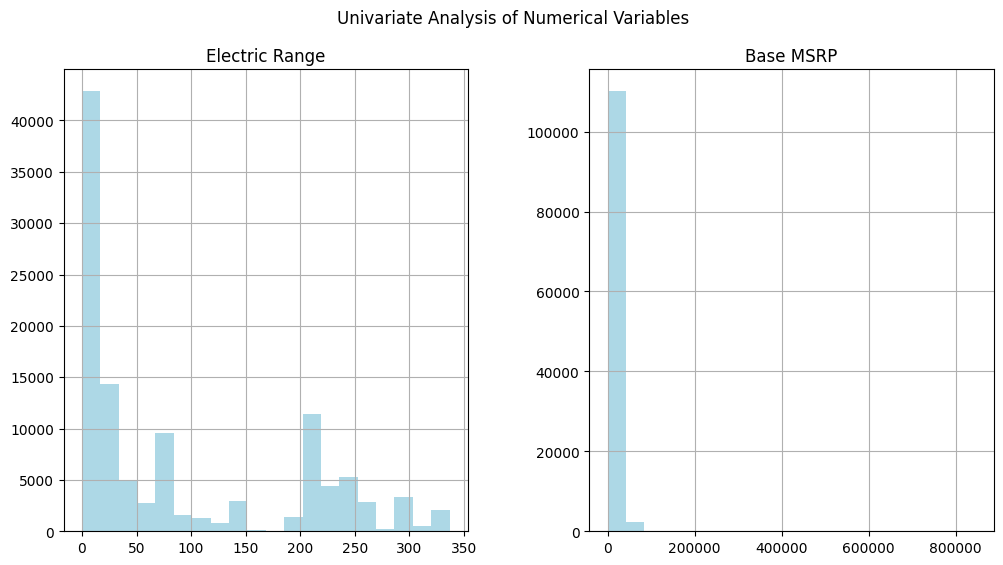

Univariate Numerical Analysis Completed | Time: 2024-10-11 14:31:31
Univariate Categorical Analysis Started | Time: 2024-10-11 14:31:31


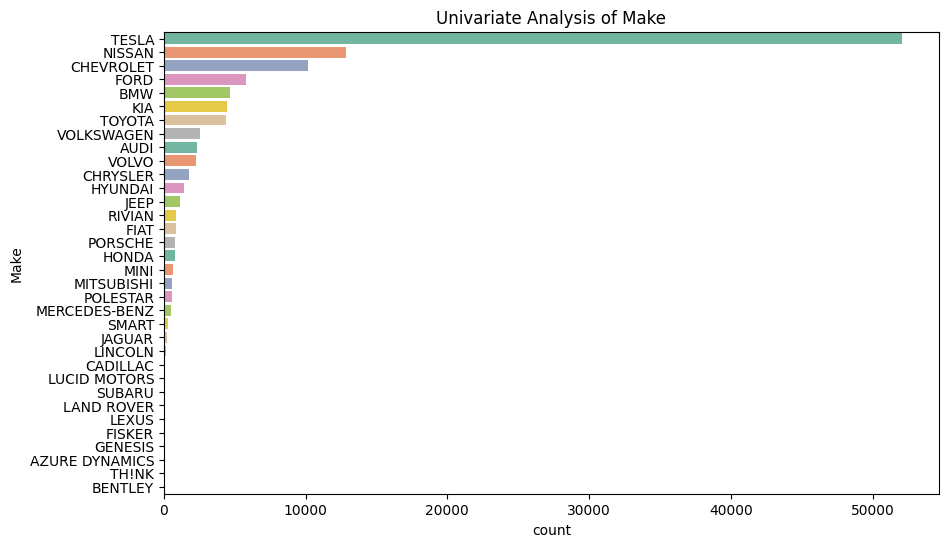

Univariate Categorical Analysis Completed | Time: 2024-10-11 14:31:31
Bivariate Numerical vs Numerical Analysis Started | Time: 2024-10-11 14:31:31


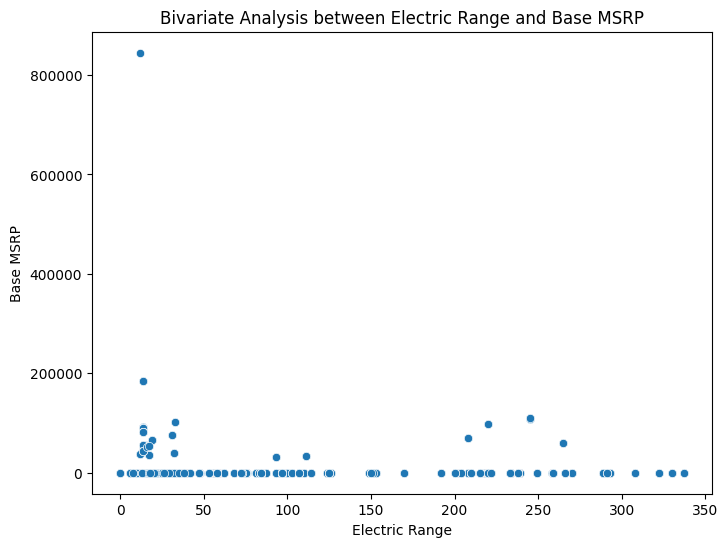

Bivariate Numerical vs Numerical Analysis Completed | Time: 2024-10-11 14:31:32
Bivariate Categorical vs Categorical Analysis Started | Time: 2024-10-11 14:31:32


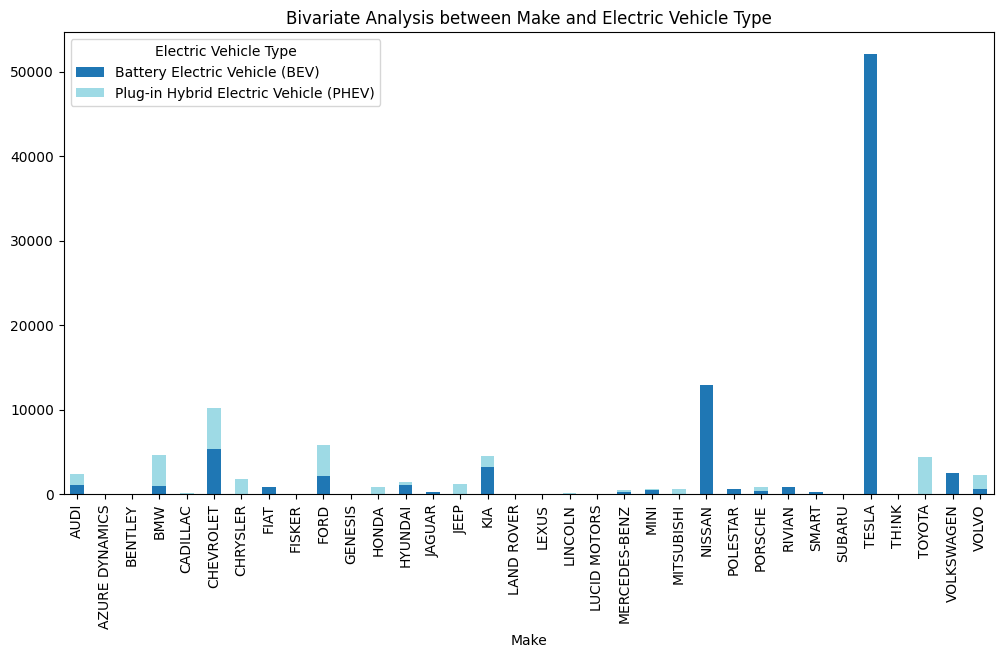

Bivariate Categorical vs Categorical Analysis Completed | Time: 2024-10-11 14:31:33
Bivariate Categorical vs Numerical Analysis Started | Time: 2024-10-11 14:31:33


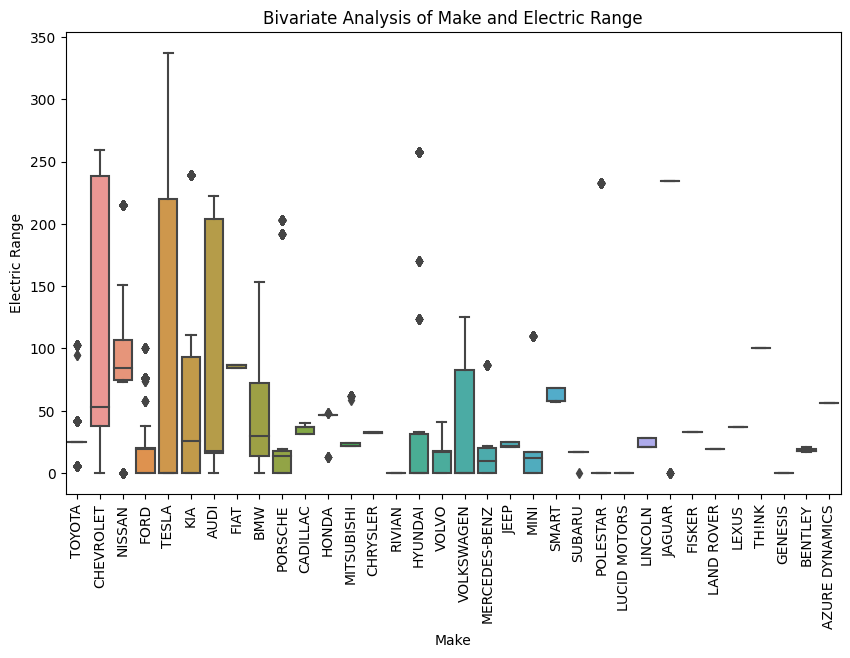

Bivariate Categorical vs Numerical Analysis Completed | Time: 2024-10-11 14:31:33
Choropleth Map Generation Started | Time: 2024-10-11 14:31:33


Choropleth Map Generation Completed | Time: 2024-10-11 14:31:34
Racing Bar Chart Generation Started | Time: 2024-10-11 14:31:34


/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



Racing bar chart saved at ev_sales_race.mp4
Racing Bar Chart Generation Completed | Time: 2024-10-11 14:31:59


In [44]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import bar_chart_race as bcr
from IPython.display import Video
import time
from datetime import datetime

# Function to print current time and step
def print_step(step):
    print(f"{step} | Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Load your dataset
df = pd.read_csv('/kaggle/input/evdataset/dataset.csv')  # Replace with your actual dataset path
print_step("Dataset Loaded")

# Check the types of each column
print(df.dtypes)
print_step("Data Types Checked")

# Separate the columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)
print_step("Identified Numerical and Categorical Columns")

# Task 1: Univariate and Bivariate Analysis

# Univariate Analysis for Numerical Variables
def univariate_numerical(df, columns):
    df[columns].hist(bins=20, figsize=(12, 6), color='lightblue')
    plt.suptitle('Univariate Analysis of Numerical Variables')
    plt.show()

print_step("Univariate Numerical Analysis Started")
univariate_numerical(df, ['Electric Range', 'Base MSRP'])  # Replace with your numerical columns
print_step("Univariate Numerical Analysis Completed")

# Univariate Analysis for Categorical Variables
def univariate_categorical(df, column):
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette='Set2')
    plt.title(f'Univariate Analysis of {column}')
    plt.show()

print_step("Univariate Categorical Analysis Started")
univariate_categorical(df, 'Make')  # Replace with your categorical column
print_step("Univariate Categorical Analysis Completed")

# Bivariate Analysis: Numerical vs Numerical
def bivariate_num_vs_num(df, x_col, y_col):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Bivariate Analysis between {x_col} and {y_col}')
    plt.show()

print_step("Bivariate Numerical vs Numerical Analysis Started")
bivariate_num_vs_num(df, 'Electric Range', 'Base MSRP')  # Replace with your numerical columns
print_step("Bivariate Numerical vs Numerical Analysis Completed")

# Bivariate Analysis: Categorical vs Categorical
def bivariate_cat_vs_cat(df, x_col, y_col):
    cross_tab = pd.crosstab(df[x_col], df[y_col])
    cross_tab.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
    plt.title(f'Bivariate Analysis between {x_col} and {y_col}')
    plt.show()

print_step("Bivariate Categorical vs Categorical Analysis Started")
bivariate_cat_vs_cat(df, 'Make', 'Electric Vehicle Type')  # Replace with your categorical columns
print_step("Bivariate Categorical vs Categorical Analysis Completed")

# Bivariate Analysis: Categorical vs Numerical
def bivariate_cat_vs_num(df, cat_col, num_col):
    plt.figure(figsize=(10,6))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'Bivariate Analysis of {cat_col} and {num_col}')
    plt.show()

print_step("Bivariate Categorical vs Numerical Analysis Started")
bivariate_cat_vs_num(df, 'Make', 'Electric Range')  # Replace with a categorical and numerical column
print_step("Bivariate Categorical vs Numerical Analysis Completed")

# Task 2: Choropleth Map using Plotly Express
def plot_choropleth(df):
    ev_count_by_state = df.groupby('State').size().reset_index(name='EV Count')
    fig = px.choropleth(ev_count_by_state, locations='State', locationmode='USA-states', 
                        color='EV Count', color_continuous_scale="Viridis", 
                        scope="usa", title="Number of Electric Vehicles by State")
    fig.show()

print_step("Choropleth Map Generation Started")
plot_choropleth(df)
print_step("Choropleth Map Generation Completed")

# Task 3: Racing Bar Chart for EV Sales Over the Years
def create_racing_bar_chart(df):
    # Prepare data for racing bar chart
    sales_by_year_make = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)
    # Sort by years for animation
    sales_by_year_make = sales_by_year_make.loc[sorted(sales_by_year_make.index)]
    
    # Save the racing bar chart as a video
    video_path = "ev_sales_race.mp4"
    bcr.bar_chart_race(df=sales_by_year_make, filename=video_path, figsize=(10, 6), 
                       title="EV Sales by Make over the Years", n_bars=8)
    print(f"Racing bar chart saved at {video_path}")

print_step("Racing Bar Chart Generation Started")
create_racing_bar_chart(df)
print_step("Racing Bar Chart Generation Completed")


In [45]:
import os

# Check if the file exists
file_name = 'ev_sales_race.mp4'
if file_name in os.listdir('/kaggle/working'):
    print(f"{file_name} found in the working directory.")
else:
    print(f"{file_name} not found in the working directory.")


ev_sales_race.mp4 found in the working directory.


In [46]:
from IPython.display import FileLink

# Create a download link for the video file
FileLink('/kaggle/working/ev_sales_race.mp4')


/kaggle/working/ev_sales_race.mp4

In [47]:
import os

# List all files in the working directory
os.listdir('/kaggle/working/')


['.virtual_documents', 'ev_sales_race.mp4']

In [49]:
from IPython.display import FileLink

# Create a download link for the video file
FileLink('/kaggle/working/ev_sales_race.mp4')


/kaggle/working/ev_sales_race.mp4

In [50]:
import os

# List all files in the working directory
os.listdir('/kaggle/working/')


['.virtual_documents', 'ev_sales_race.mp4']

In [52]:
import os

# Check if the file was created
if 'ev_sales_race.mp4' in os.listdir('/kaggle/working/'):
    print("File successfully created!")
else:
    print("File not found. Please check if the bar chart race code ran successfully.")


File successfully created!


In [53]:
# Task 3: Racing Bar Chart for EV Sales Over the Years
def create_racing_bar_chart(df):
    # Prepare data for racing bar chart
    sales_by_year_make = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)
    # Sort by years for animation
    sales_by_year_make = sales_by_year_make.loc[sorted(sales_by_year_make.index)]
    
    # Save the racing bar chart as a video
    video_path = "ev_sales_race.mp4"
    bcr.bar_chart_race(df=sales_by_year_make, filename=video_path, figsize=(10, 6), 
                       title="EV Sales by Make over the Years", n_bars=8)
    print(f"Racing bar chart saved at {video_path}")

print_step("Racing Bar Chart Generation Started")
create_racing_bar_chart(df)
print_step("Racing Bar Chart Generation Completed")

Racing Bar Chart Generation Started | Time: 2024-10-11 14:39:30


/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



Racing bar chart saved at ev_sales_race.mp4
Racing Bar Chart Generation Completed | Time: 2024-10-11 14:39:55


In [55]:
from IPython.display import FileLink

# Create a download link for the video file
download_link = FileLink('/kaggle/working/ev_sales_race.mp4')
display(download_link)


/kaggle/working/ev_sales_race.mp4

In [56]:
from IPython.display import FileLink, display

# Create a download link for the video file
download_link = FileLink('/kaggle/working/ev_sales_race.mp4')
display(download_link)


/kaggle/working/ev_sales_race.mp4

In [57]:
# List files in the working directory
print(os.listdir('/kaggle/working/'))


['.virtual_documents', 'ev_sales_race.mp4']
